In [2]:
!pip install textblob

# Import Libaries

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob

# Import Data

In [4]:
df=pd.read_csv("C:/Users/Sahil Sethi/Downloads/archive (7)/netflix_titles.csv")

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Checking number of rows and columns in data

In [6]:
df.shape

(8807, 12)

# Checking content available in Dataset

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# How to check columns name of dataset

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Taking the count of ratings available

In [9]:
x=df.groupby(['rating']).size().reset_index(name='counts')

In [10]:
x

,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


# Creating the Piechart based on Content rating

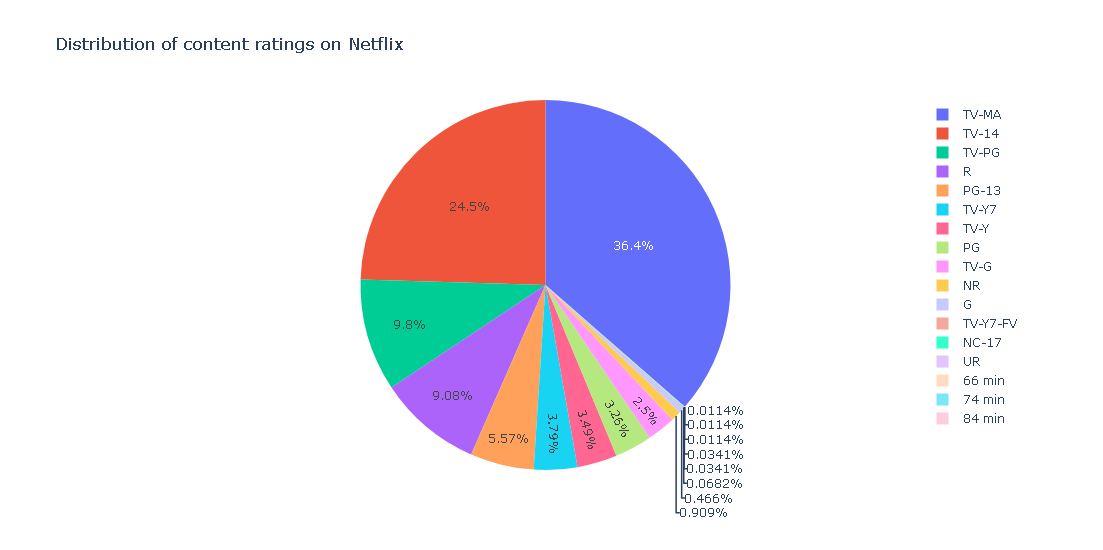

In [17]:
piechart=px.pie(x, values='counts',names='rating', title='Distribution of content ratings on Netflix',width=800,height=550)
piechart.show()

# Analyzing the Top 5 Directors on Netflix

In [19]:
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
directors_list=pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [23]:
directors_list=df['director'].str.split(',',expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [27]:
directors_list=directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [28]:
directors_list.columns = ['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [29]:
directors=directors_list.groupby(['Director']).size().reset_index(name='Total_Count')
print(directors)

                       Director  Total_Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [30]:
directors = directors[directors.Director !='Director not specified']
print(directors)

                       Director  Total_Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [32]:
directors=directors.sort_values(by=['Total_Count'],ascending=False)
print(directors)

           Director  Total_Count
4021  Rajiv Chilaka           22
261       Jan Suter           18
4068    Raúl Campos           18
3236   Marcus Raboy           16
4652    Suhas Kadav           16
...             ...          ...
3218    Marc Meyers            1
3217     Marc Levin            1
3216   Marc Francis            1
3215  Marc Fouchard            1
5014  Will Lovelace            1

[5120 rows x 2 columns]


In [33]:
Top5Directors=directors.head()

In [34]:
print(Top5Directors)

           Director  Total_Count
4021  Rajiv Chilaka           22
261       Jan Suter           18
4068    Raúl Campos           18
3236   Marcus Raboy           16
4652    Suhas Kadav           16


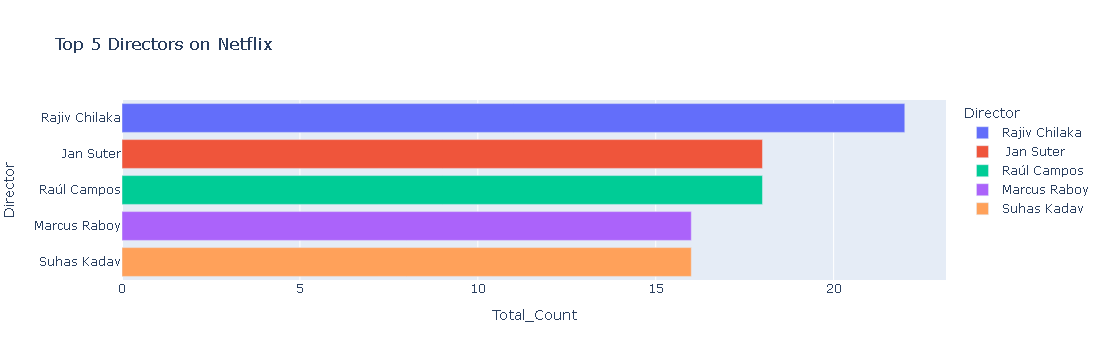

In [42]:
Top5Directors= Top5Directors.sort_values(by=['Total_Count'],ascending=False)
barChart = px.bar(Top5Directors, x='Total_Count', y='Director', title= 'Top 5 Directors on Netflix' ,color='Director')
barChart.show()

# Analyzing the Top 5 Actors on Netflix

In [60]:
df['cast']=df['cast'].fillna('No cast specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [61]:
casts_list=pd.DataFrame()
print(casts_list)

Empty DataFrame
Columns: []
Index: []


In [62]:
casts_list=df['cast'].str.split(',',expand=True).stack()
print(casts_list)

0     0         No cast specified
1     0                Ama Qamata
      1               Khosi Ngema
      2             Gail Mabalane
      3            Thabang Molaba
                    ...          
8806  3          Manish Chaudhary
      4              Meghna Malik
      5             Malkeet Rauni
      6            Anita Shabdish
      7     Chittaranjan Tripathy
Length: 64951, dtype: object


In [63]:
casts_list=casts_list.to_frame()
print(casts_list)

                             0
0    0       No cast specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]


In [76]:
casts_list.columns = ['Actor']
print(casts_list)

                         Actor
0    0       No cast specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]


In [78]:
actors=casts_list.groupby(['Actor']).size().reset_index(name='Total_count')
print(actors)

                        Actor  Total_count
0                         Jr.            2
1       "Riley" Lakdhar Dridi            1
2                'Najite Dede            1
3                    2 Chainz            1
4                        2Mex            1
...                       ...          ...
39292         İbrahim Büyükak            1
39293        İbrahim Çelikkol            1
39294             Şahin Irmak            1
39295          Şükrü Özyıldız            1
39296            Ṣọpẹ́ Dìrísù            1

[39297 rows x 2 columns]


In [79]:
actors = actors[actors.Actor !='No cast specified']
print(actors)

                        Actor  Total_count
0                         Jr.            2
1       "Riley" Lakdhar Dridi            1
2                'Najite Dede            1
3                    2 Chainz            1
4                        2Mex            1
...                       ...          ...
39292         İbrahim Büyükak            1
39293        İbrahim Çelikkol            1
39294             Şahin Irmak            1
39295          Şükrü Özyıldız            1
39296            Ṣọpẹ́ Dìrísù            1

[39296 rows x 2 columns]


In [80]:
actors=actors.sort_values(by=['Total_count'],ascending=False)
print(actors)

                   Actor  Total_count
2612         Anupam Kher           39
26941       Rupa Bhimani           31
30303   Takahiro Sakurai           30
15541      Julie Tejwani           28
23624            Om Puri           27
...                  ...          ...
15290        João Côrtes            1
15289      João Assunção            1
15288     Joziah Lagonoy            1
15287        Jozef Gjura            1
39296       Ṣọpẹ́ Dìrísù            1

[39296 rows x 2 columns]


In [81]:
Top5Actors=actors.head()
print(Top5Actors)

                   Actor  Total_count
2612         Anupam Kher           39
26941       Rupa Bhimani           31
30303   Takahiro Sakurai           30
15541      Julie Tejwani           28
23624            Om Puri           27


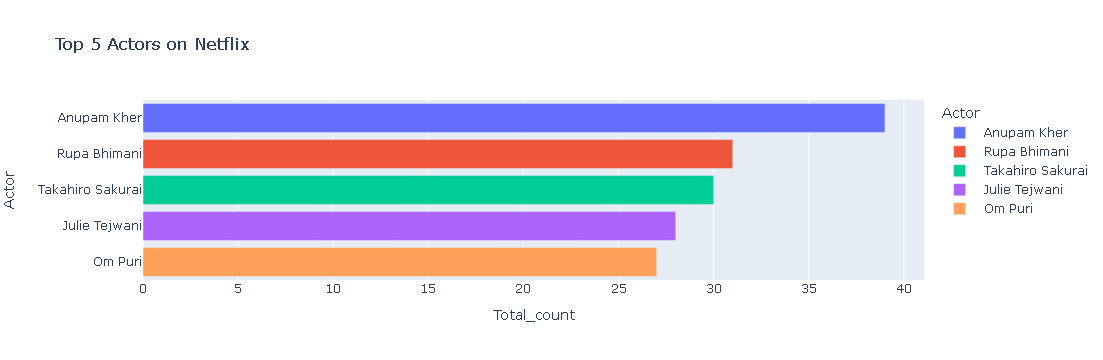

In [88]:
Top5Actors= Top5Actors.sort_values(by=['Total_count'],ascending=False)
barChart = px.bar(Top5Actors, x='Total_count', y='Actor', title= 'Top 5 Actors on Netflix',color='Actor')
barChart.show()

# Analyzing the content produced on netflix based on years

In [91]:
df1 = df[['type','release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type":"Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total count')

In [92]:
print(df2)

     Release Year     Type  Total count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


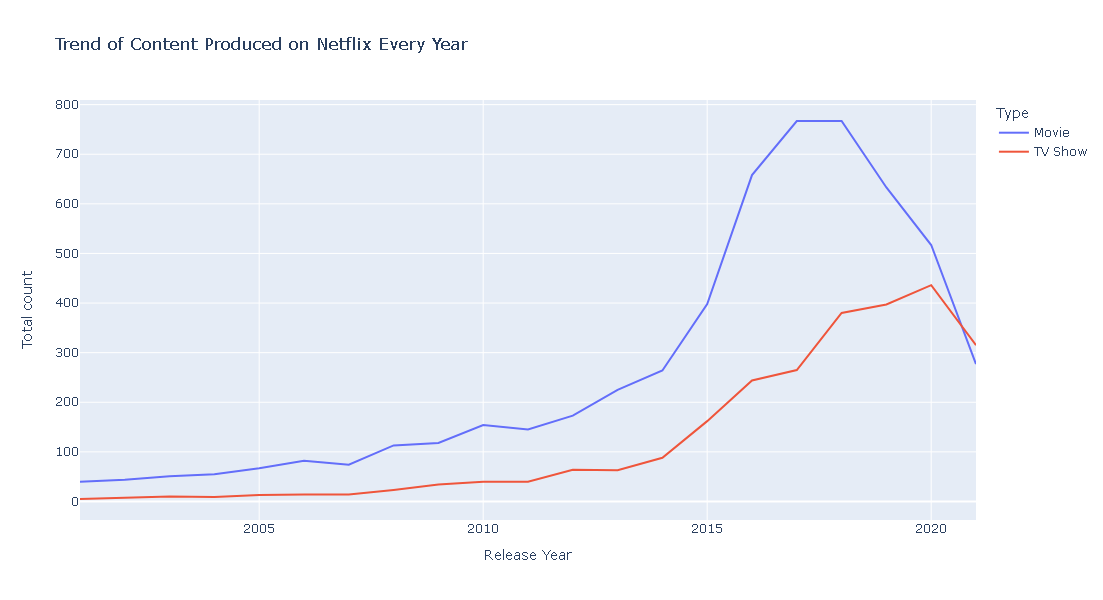

In [101]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x="Release Year",y="Total count", color="Type", title="Trend of Content Produced on Netflix Every Year ",width=1100,height=600)
graph.show()

# Sentiment Analysis of Netflix Content

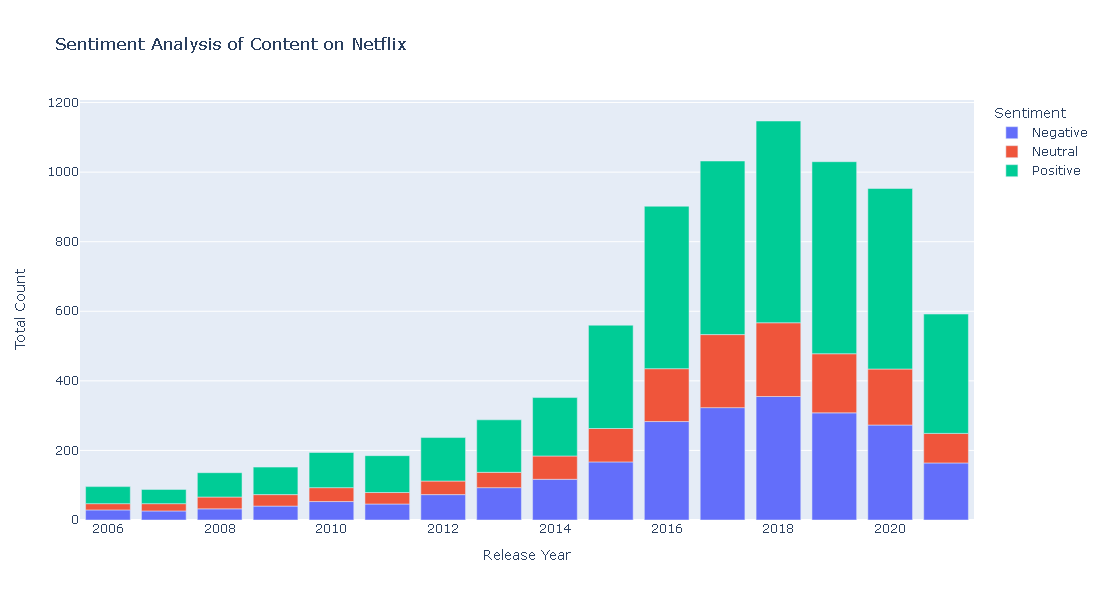

In [107]:
df3 = df[['release_year', 'description']]
df3 = df.rename(columns ={'release_year':'Release Year', 'description':'Description'})
for index,row in df3.iterrows():
    d=row['Description']
    testimonial = TextBlob(d)
    p= testimonial.sentiment.polarity
    if p==0:
        sent = 'Neutral'
    elif p>0:
        sent = 'Positive'
    else:
        sent = 'Negative'
    df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

df3 = df3[df3['Release Year']>2005]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Sentiment Analysis of Content on Netflix",width=1000,height=600)
barGraph.show()

# Content Analysis by Country for Top 10 Countries on Netflix

In [108]:
df['country']=df['country'].fillna('Country not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [109]:
df['country'] = df['country'].str.split(', ')
df = df.explode('country')  # Separate rows for each country if multiple countries are listed


In [112]:
# Group by country and count the total content
country_content = df.groupby('country').size().reset_index(name='Total Content')

# Sort the data to get the top 10 countries
top_countries = country_content.sort_values(by='Total Content', ascending=False).head(10)



In [113]:
# Filter the dataset to include only the top 10 countries
top_countries_list = top_countries['country'].tolist()  # Create a list of the top 10 countries
df_top_countries = df[df['country'].isin(top_countries_list)]


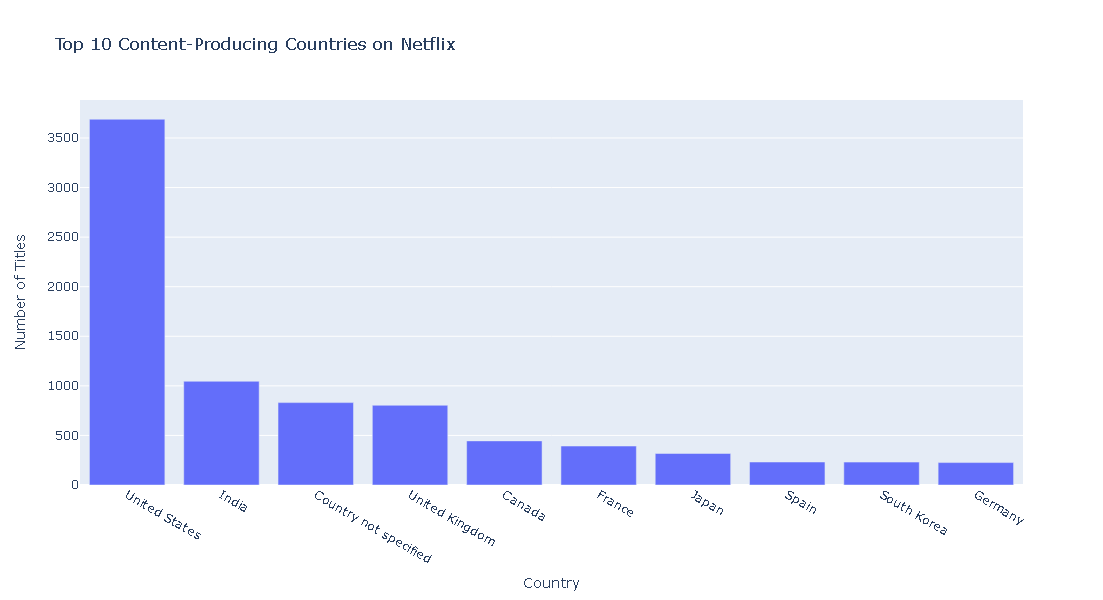

In [114]:
import plotly.express as px

# Plot the top 10 content-producing countries using a bar chart
barGraph = px.bar(top_countries, 
                  x='country', 
                  y='Total Content', 
                  title='Top 10 Content-Producing Countries on Netflix',
                  labels={'country': 'Country', 'Total Content': 'Number of Titles'},
                  height=600, 
                  width=1000)
barGraph.show()


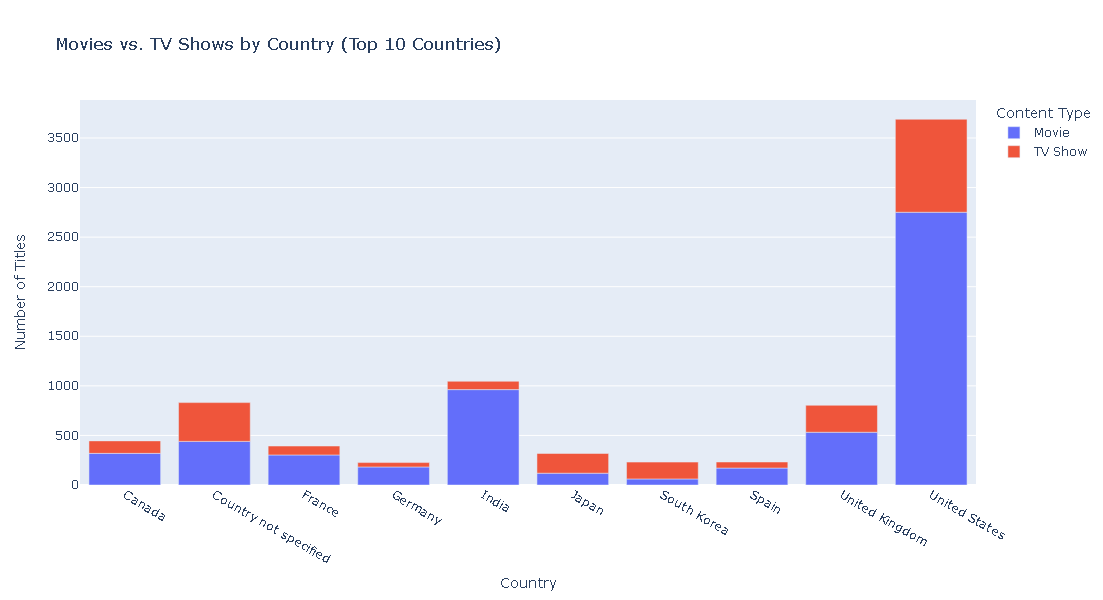

In [125]:
# Group by country and type (Movies vs TV Shows)
country_type = df_top_countries.groupby(['country', 'type']).size().reset_index(name='Total Count')

# Plot a bar chart showing the distribution of content types by country
typeGraph = px.bar(country_type, 
                   x='country', 
                   y='Total Count', 
                   color='type', 
                   title='Movies vs. TV Shows by Country (Top 10 Countries)',
                   labels={'country': 'Country', 'Total Count': 'Number of Titles', 'type': 'Content Type'},
                   height=600, 
                   width=1000)
typeGraph.show()


# Ratings Analysis for Top 10 Countries on Netflix

In [119]:
# Handle missing values in the 'rating' and 'country' columns
df['rating'] = df['rating'].fillna(0)  # You can replace NaN ratings with 0 or another placeholder
df['country'] = df['country'].fillna('Unknown')

# Split multiple countries into separate rows if needed
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

In [120]:
# Group by country and count the total number of titles
country_content = df.groupby('country').size().reset_index(name='Total Content')

# Sort by content count and get the top 10 countries
top_countries = country_content.sort_values(by='Total Content', ascending=False).head(10)


In [121]:
# Filter the dataset to include only the top 10 countries
top_countries_list = top_countries['country'].tolist()
df_top_countries = df[df['country'].isin(top_countries_list)]


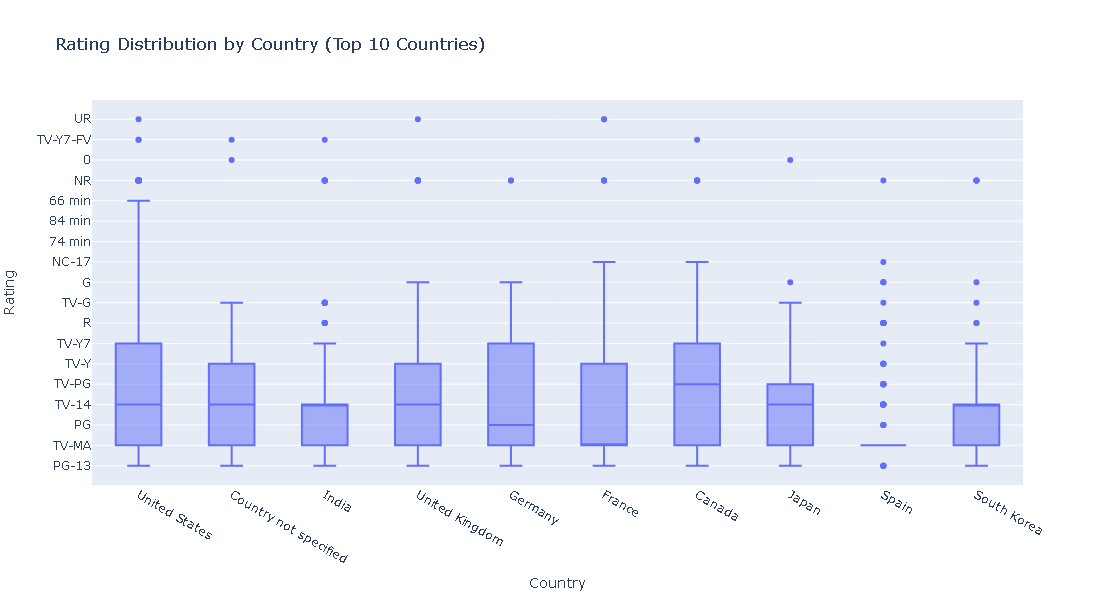

In [122]:
import plotly.express as px

# Create a box plot to show rating distribution by country
boxPlot = px.box(df_top_countries, 
                 x='country', 
                 y='rating', 
                 title='Rating Distribution by Country (Top 10 Countries)',
                 labels={'country': 'Country', 'rating': 'Rating'},
                 height=600, 
                 width=1000)
boxPlot.show()


This project delivers a multifaceted analysis of Netflix's content, encompassing the top 5 directors and actors, trends in content production by year, sentiment analysis of Netflix titles, and a detailed examination of content by country for the top 10 countries. Additionally, it includes a ratings analysis for these top 10 countries, offering a holistic view of global content trends and audience sentiment on Netflix.